In [1]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [6]:
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
maxwellboltzmann = {"m": 18, "n": -3, "d": np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 0.1}

# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    perturbations_args=[separatrix],
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.41, -0.7],
    tol=1e-9,
)

# # Adding perturbation after the object is created uses the found axis as center point
pyoproblem.add_perturbation(maxwellboltzmann)

### Finding the X-point
print("\nFinding the X-point\n")

# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
guess = [6.21560891, -4.46981856]
print(f"Initial guess: {guess}")

fixedpoint.compute(guess=guess, pp=0, qq=1, sbegin=4, send=9, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(fixedpoint, pyoproblem, integrator_params=iparams)

# Choose the tangles to work with
manifold.choose(0, 0)

0 - dr : 0.010422282084043258
1 - RZ : [ 6.41409394 -0.69368043]
1 - dr : 6.293042617255254e-06
2 - RZ : [ 6.41409781 -0.69367863]
2 - dr : 9.776471937205409e-12
0 - dr : 9.776471937205409e-12

Finding the X-point

Initial guess: [6.21560891, -4.46981856]
0 - [DeltaR, DeltaZ] : [0.36712439 0.29354433] - dtheta : 0.10090020227304075
0 - [StepR, StepZ]: [-0.0234081  -0.02046676]
1 - RZ : [ 6.19220081 -4.49028532] - rhotheta : [ 3.80308568 -1.62917605]
1 - [DeltaR, DeltaZ] : [-0.16091763 -0.17273987] - dtheta : 0.03776565443633717
1 - [StepR, StepZ]: [0.00554841 0.00261813]
2 - RZ : [ 6.19774921 -4.4876672 ] - rhotheta : [ 3.8001521  -1.62775869]
2 - [DeltaR, DeltaZ] : [-0.01702951 -0.02887643] - dtheta : 0.004009927099813071
2 - [StepR, StepZ]: [ 0.00592305 -0.00817383]
3 - RZ : [ 6.20367226 -4.49584103] - rhotheta : [ 3.80798081 -1.62608358]
3 - [DeltaR, DeltaZ] : [0.00038633 0.00017684] - dtheta : 9.873634145995958e-05
3 - [StepR, StepZ]: [ 5.61222934e-05 -1.29116512e-04]
4 - RZ : [ 6.

In [ ]:
fig = pickle.load(open("manifold_05070828.pkl", "rb"))
ax = fig.gca()

In [7]:
manifold.find_clinics(n_points = 6, n_s = 8, n_u = 4)

2024-05-13 08:53:15 [info     ] Search for minimum of the linear error succeeded, epsilon = 2.05960e-07
2024-05-13 08:53:15 [info     ] Search for minimum of the linear error succeeded, epsilon = 3.50421e-07
2024-05-13 08:53:15 [debug    ] Guess - 2.841796647265769e-06, 4.835040517664605e-06
2024-05-13 08:53:15 [debug    ] Bounds - ((2.0595966951673615e-07, 5.8895529640482745e-06), (3.5042123103502937e-07, 1.0020502266364239e-05))
2024-05-13 08:53:15 [debug    ] n_s, n_u - 8, 4
2024-05-13 08:53:16 [debug    ] Inside : (2.841796647265769e-06, 4.8350405176646055e-06) - (array([ 7.52089181, -3.3634105 ]), array([ 7.26530803, -3.62043527]), array([0.25558378, 0.25702477]))
2024-05-13 08:53:18 [debug    ] Inside : (5.552934118803882e-06, 5.147685554951476e-06) - (array([ 7.36642531, -3.54834794]), array([ 7.3012847 , -3.58754219]), array([0.06514061, 0.03919425]))
2024-05-13 08:53:20 [debug    ] Inside : (5.0263451775334575e-06, 5.88845337625653e-06) - (array([ 7.52528534, -3.45160152]), ar

In [8]:
manifold.clinics

[(5.295892366020724e-06,
  5.710790756693377e-06,
  5.295892366020724e-06,
  array([ 7.31772073, -3.57227567]),
  array([ 7.31772073, -3.57227567])),
 (7.324795688452331e-06,
  8.727263882255978e-05,
  7.324795688190151e-06,
  array([ 6.32002033, -4.39369528]),
  array([ 6.32002033, -4.39369528])),
 (1.6194596382397742e-05,
  5.3400968875835284e-05,
  1.619459638245612e-05,
  array([ 6.43883799, -4.29410543]),
  array([ 6.43883799, -4.29410543])),
 (2.2398831100995104e-05,
  2.8540570244770503e-05,
  2.2398831101088935e-05,
  array([ 6.51149265, -4.23474404]),
  array([ 6.51149265, -4.23474404])),
 (4.95216367782146e-05,
  1.7463307423260323e-05,
  4.952163677803348e-05,
  array([ 6.7646567 , -4.03244208]),
  array([ 6.7646567 , -4.03244208])),
 (6.849308615856005e-05,
  9.333289600871069e-06,
  6.8493086158519e-05,
  array([ 6.90205567, -3.92354771]),
  array([ 6.90205567, -3.92354771]))]

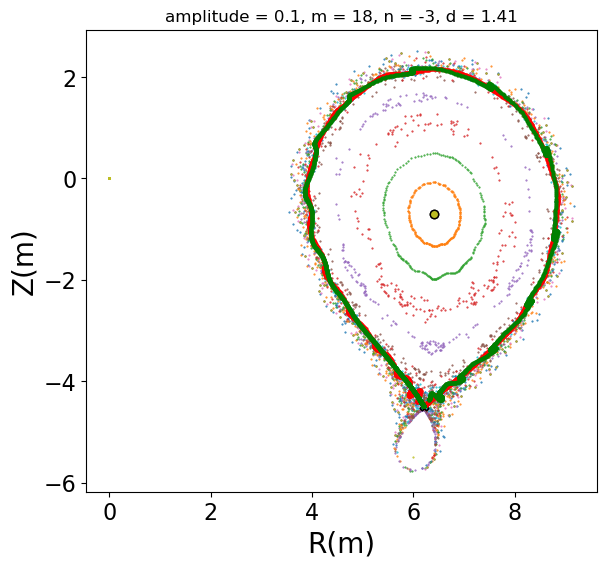

In [9]:
fig = pickle.load(open("manifold_05070825.pkl", "rb"))
ax = fig.gca()

In [10]:
marker = ["+", "o", "s", "p", "P", "*", "X", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(manifold.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_s, n_u = 8, 8
    
    hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)
    hu_i = manifold.integrate(manifold.rfp_u + eps_u_i * manifold.vector_u, n_u, 1)
    ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="purple", zorder=10)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="blue", zorder=10)

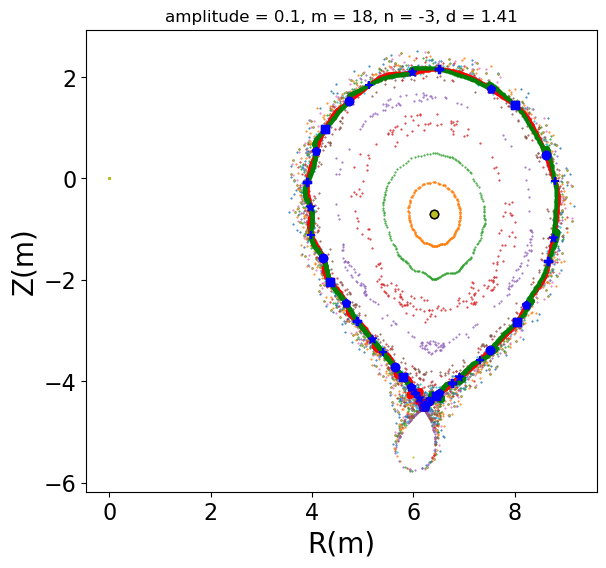

In [11]:
# ax.set_xlim(6, 8)
# ax.set_ylim(-5, -3.5)
# ax.set_xlim(6, 9)
# ax.set_ylim(-5, -1)
fig

In [12]:
manifold.resonance_area()

2024-05-13 08:58:38 [info     ] Forward integration goes beyond stable saddle point.
2024-05-13 08:58:38 [debug    ] rfp_s: [ 6.2037284  -4.49597016], rze_end: [ 6.20370188 -4.49599422], rze_forward: [ 6.20372737 -4.49597083]
2024-05-13 08:58:38 [info     ] Backward integration goes beyond unstable saddle point.
2024-05-13 08:58:38 [debug    ] rfp_u: [ 6.2037284  -4.49597016], rze_end: [ 6.20372948 -4.49597205], rze_backward: [ 6.20372857 -4.4959701 ]
2024-05-13 08:58:38 [info     ] Potential integration completed for homo/hetero-clinic point of order : 5.296e-06
2024-05-13 08:58:40 [info     ] Forward integration goes beyond stable saddle point.
2024-05-13 08:58:40 [debug    ] rfp_s: [ 6.2037284  -4.49597016], rze_end: [ 6.20374592 -4.49595425], rze_forward: [ 6.20372896 -4.49596951]
2024-05-13 08:58:41 [info     ] Backward integration goes beyond unstable saddle point.
2024-05-13 08:58:41 [debug    ] rfp_u: [ 6.2037284  -4.49597016], rze_end: [ 6.20372906 -4.49597133], rze_backward: 

(array([ 0.15431293, -0.15427744,  0.15431864, -0.15429651,  0.1542856 ,
        -0.15426616]),
 [[array([-13.79247217, -14.02268571,   2.86592523, -14.24222603,
           -8.72093151,  10.32191687,  12.34646604,  12.42329393,
           12.42601946]),
   array([ 16.17648933,  -9.53761044, -12.31594272, -12.42222103,
          -12.42595132])],
  [array([-19.50826188,  -9.65242793, -17.2141283 ,   3.22034328,
          -17.06882323,  -3.66070475,  11.25896094,  12.38347357,
           12.42459199,  12.42601185]),
   array([ -8.5551723 , -12.27394071, -12.42074082, -12.42589827,
          -12.42607943])],
  [array([-26.3559764 ,  -2.63169606, -17.67514545,   5.06298943,
          -19.18147628,   0.16743044,  11.6996508 ,  12.39999617,
           12.42517211,  12.42605731]),
   array([ -4.86200504, -12.09156927, -12.41427147, -12.42567187,
          -12.42606992])],
  [array([-27.35403268,  -3.00485073, -15.17894785,   0.71456227,
          -18.04971457,   4.3382868 ,  12.03286231,  12.4

In [13]:
areas = manifold.areas
areas

array([ 0.15431293, -0.15427744,  0.15431864, -0.15429651,  0.1542856 ,
       -0.15426616])

In [ ]:
areas[0]*2

In [14]:
areas[areas > 0].sum()

0.46291717513743436

In [15]:
areas[areas < 0].sum()

-0.4628401043037087